In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import networkx as nx
import datetime

In [29]:
df1 = pd.read_csv(r'C:\Users\Sofia\OneDrive - NOVAIMS\Nova IMS\Mestrado\2º semestre\Business Cases\BC3\AsianRestaurant_Cyprus_2018.txt', sep=';')

# Create week day attribute

In [31]:
df1['InvoiceDateHour_time'] =  pd.to_datetime(df1['InvoiceDateHour'], format='%Y-%m-%d %H:%M:%S.%f')

In [73]:
df1.drop(columns=['InvoiceDateHour'],inplace=True)

In [47]:
weekDays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

In [48]:
df1['Weekday'] = df1.InvoiceDateHour_time.apply(lambda x: weekDays[x.weekday()])

In [58]:
df1['InvoiceHour'] = df1.InvoiceDateHour_time.apply(lambda x: x.hour)

# Create dinner/lunch attribute

In [68]:
df1.groupby(by='IsDelivery')['InvoiceHour'].value_counts()

IsDelivery  InvoiceHour
0           22             22479
            23             12674
            21              9065
            15              3126
            14              2938
            20              1866
            13               403
            0                153
            19                97
            16                22
            12                21
            18                11
            11                 5
            17                 1
1           20             11901
            19             10594
            21              5673
            22              1078
            13               667
            12               509
            18               459
            14               315
            11                29
            15                14
            23                 9
Name: InvoiceHour, dtype: int64

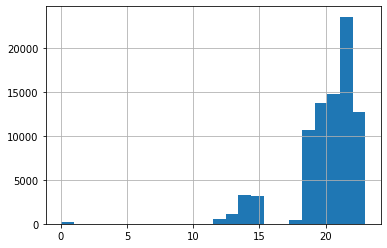

In [66]:
df1.InvoiceHour.hist(bins=24)

In [71]:
df1['Meal'] = df1.InvoiceHour.apply(lambda x: 'Lunch' if x<=17 and x>10 else 'Dinner')

# Create holiday

In [87]:
df1['Date'] = df1.InvoiceDateHour_time.apply(lambda x: x.date())

In [84]:
holidays = ['01 Jan 2018','06 Jan 2018','19 Feb 2018','25 Mar 2018','01 Apr 2018','06 Apr 2018','07 Apr 2018','08 Apr 2018','09 Apr 2018','01 May 2018','28 May 2018','15 Aug 2018','01 Oct 2018','28 Oct 2018','24 Dec 2018','25 Dec 2018','26 Dec 2018','31 Dec 2018']

In [85]:
holidays_date = pd.to_datetime(holidays,format='%d %b %Y')

In [91]:
df1['Holiday'] = df1.Date.apply(lambda x: 1 if x in holidays_date else 0)

# Create season

In [117]:
def get_season(data):
    
    if data >= pd.to_datetime('2018-03-20') and data < pd.to_datetime('2018-06-21'):
        return 'Spring'
    elif data >= pd.to_datetime('2018-06-21') and data < pd.to_datetime('2018-09-23'):
        return 'Summer'
    elif data >= pd.to_datetime('2018-09-23') and data < pd.to_datetime('2018-12-22'):
        return 'Autumn'
    else:
        return 'Winter'

In [119]:
df1['Season'] = df1.Date.apply(get_season)

# Create weather

https://www.wunderground.com/history/monthly/cy/τύμβου/LCEN/date/2018-7

In [3]:
qty_amount = df1[['DocNumber','ProductDesignation','Qty','TotalAmount']].groupby(['DocNumber','ProductDesignation']).sum()

In [4]:
family_deliv = df1.drop_duplicates(subset=['DocNumber','ProductDesignation'],keep= 'first')[['DocNumber','ProductDesignation','ProductFamily','IsDelivery']]

In [5]:
df_clean = family_deliv.merge(qty_amount, how='left',on=['DocNumber','ProductDesignation'])

In [17]:
df_clean

,DocNumber,ProductDesignation,ProductFamily,IsDelivery,Qty
0,110000012018,SWEETCORN SOUP,SOUPS,0,2.0
1,110000012018,SPRING ROLL,STARTERS,0,2.0
2,110000012018,EGG FRIED RICE,RICE,0,1.0
3,110000012018,SWEET SOUR CHICKEN,MEAT,0,1.0
4,110000012018,LAMB ROGAN JOSH,MAIN IND,0,1.0
...,...,...,...,...,...
79334,320044522018,DELIVERY CHARGE,EXTRAS,1,1.0
79335,320044532018,SAMOSA,START IND,1,1.0
79336,320044532018,ALOO PALAK,VEG IND,1,1.0
79337,320044532018,NAAN,BREADS IND,1,3.0


In [16]:
df_clean_prod = df_clean[['DocNumber','ProductDesignation']]
df_clean_family = df_clean[['DocNumber','ProductFamily']]
df_clean_fam_prod = df_clean[['DocNumber','ProductFamily','ProductDesignation']]

In [7]:
pivot_family = pd.pivot_table(df_clean_family, index='DocNumber', columns='ProductFamily', aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)
pivot_family.head()

ProductFamily,BREADS IND,DESSERT,DESSERT IND,DRINKS,EXTRAS,HOLDS,JAP SUSHI,MAIN IND,MEAT,NEW SUSHI,...,SOUPS,SPIRITS,START IND,STARTERS,SUSHI,TSANTES,VEG,VEG IND,WHITE WINE,WITH
DocNumber,,,,,,,,,,,,,,,,,,,,,
110000012018,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
110000022018,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
110000032018,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
110000042018,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
110000052018,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [8]:
pivot_prod = pd.pivot_table(df_clean_prod, index='DocNumber', columns='ProductDesignation', aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)
pivot_prod.head()

ProductDesignation,EXTRA PANCAKES,EXTRA SALAD,EXTRA SAUCE,NO BABY CORN,NO BEANSPROUTS,NO CHILLY,NO EGG,NO MEAT,NO MUSHROOMS,NO ONION,...,VOLCANO MAKI,WHISKY 17.5,WHISKY 37.5CL,WHISKY 5CL,WHISKY PREMIUM 5CL,WHOLE DUCK,WINE,YELLOW DAL DHABA,ZIVANIA 20CL,ZIVANIA 5CL
DocNumber,,,,,,,,,,,,,,,,,,,,,
110000012018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110000022018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110000032018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110000042018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110000052018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pivot_prod_fam = pd.pivot_table(df_clean_prod, index='DocNumber', columns='ProductDesignation', aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)
pivot_prod_fam.head()

In [9]:
# Rules supported in at least 5% of the transactions (more info at http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)
frequent_itemsets_fam = apriori(pivot_family, min_support=0.05, use_colnames=True)
frequent_itemsets_prod = apriori(pivot_prod, min_support=0.05, use_colnames=True)

In [104]:
##### EXPLORE FREQUENT_ITEMSETS #####

# Add a column with the length
freq['length'] = freq['itemsets'].apply(lambda x: len(x))

# Length=2 and Support>=0.2
freq[(freq['length'] > 1) & (freq['support'] >= 0.2)].sort_values(by='support', ascending=False)

,support,itemsets,length
74,0.217278,"((RICE, EGG FRIED RICE), (MEAT, SWEET SOUR CHI...",2
48,0.207679,"((DRINKS, MINERAL WATER 1.5LT), (RICE, EGG FRI...",2
88,0.201848,"((STARTERS, SPRING ROLL), (RICE, EGG FRIED RICE))",2


In [10]:
##### EXPLORE FREQUENT_ITEMSETS #####

# Add a column with the length
frequent_itemsets_fam['length'] = frequent_itemsets_fam['itemsets'].apply(lambda x: len(x))

# Length=2 and Support>=0.2
frequent_itemsets_fam[(frequent_itemsets_fam['length'] > 1) & (frequent_itemsets_fam['support'] >= 0.2)].sort_values(by='support', ascending=False)

,support,itemsets,length
80,0.570109,"(STARTERS, RICE)",2
68,0.514129,"(MEAT, RICE)",2
71,0.455369,"(MEAT, STARTERS)",2
161,0.442720,"(MEAT, STARTERS, RICE)",3
77,0.368081,"(SIZZLING, RICE)",2
38,0.351933,"(DRINKS, RICE)",2
86,0.331928,"(SIZZLING, STARTERS)",2
172,0.325469,"(SIZZLING, STARTERS, RICE)",3
44,0.325469,"(DRINKS, STARTERS)",2
127,0.299542,"(DRINKS, STARTERS, RICE)",3


In [11]:
##### EXPLORE FREQUENT_ITEMSETS #####

# Add a column with the length
frequent_itemsets_prod['length'] = frequent_itemsets_prod['itemsets'].apply(lambda x: len(x))

# Length=2 and Support>=0.2
frequent_itemsets_prod[(frequent_itemsets_prod['length'] > 1) & (frequent_itemsets_prod['support'] >= 0.2)].sort_values(by='support', ascending=False)

,support,itemsets,length
73,0.217278,"(EGG FRIED RICE, SWEET SOUR CHICKEN)",2
69,0.207679,"(EGG FRIED RICE, MINERAL WATER 1.5LT)",2
72,0.201848,"(EGG FRIED RICE, SPRING ROLL)",2


In [12]:
# Generate the association rules - by confidence
rulesConfidence_prod = association_rules(frequent_itemsets_prod, metric="confidence", min_threshold=0.50)
rulesConfidence_prod.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence_prod.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
52,"(MINERAL WATER 1.5LT, NO MEAT)",(NOODLES WITH MEAT),0.065847,0.158518,0.065847,1.000000,6.308432,0.055409,inf
3,( NO MEAT),(NOODLES WITH MEAT),0.097066,0.158518,0.097066,1.000000,6.308432,0.081680,inf
56,"(SPRING ROLL, NO MEAT)",(NOODLES WITH MEAT),0.063605,0.158518,0.063605,1.000000,6.308432,0.053522,inf
47,"(EGG FRIED RICE, NO MEAT)",(NOODLES WITH MEAT),0.056428,0.158518,0.056428,1.000000,6.308432,0.047483,inf
119,"(EGG FRIED RICE, TOFFEE BANANA COMPLEMENTARY, ...",(MINERAL WATER 1.5LT),0.054006,0.511528,0.052211,0.966777,1.889980,0.024586,14.703014
92,"(EGG FRIED RICE, TOFFEE BANANA COMPLEMENTARY)",(MINERAL WATER 1.5LT),0.080380,0.511528,0.077510,0.964286,1.885109,0.036393,13.677223
109,"(TOFFEE BANANA COMPLEMENTARY, SPRING ROLL)",(MINERAL WATER 1.5LT),0.080111,0.511528,0.076254,0.951848,1.860794,0.035275,10.144319
110,"(TOFFEE BANANA COMPLEMENTARY, SWEET SOUR CHICKEN)",(MINERAL WATER 1.5LT),0.062349,0.511528,0.059209,0.949640,1.856478,0.027316,9.699663
15,(BUFFET SUSHI),(MINERAL WATER 1.5LT),0.128824,0.511528,0.120212,0.933148,1.824237,0.054315,7.306731
41,(TOFFEE BANANA COMPLEMENTARY),(MINERAL WATER 1.5LT),0.177895,0.511528,0.165515,0.930408,1.818882,0.074517,7.019134


In [13]:
# Generate the association rules - by confidence
rulesConfidence_fam = association_rules(frequent_itemsets_fam, metric="confidence", min_threshold=0.50)
rulesConfidence_fam.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence_fam.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
217,"(HOLDS, STARTERS)",(RICE),0.093209,0.679824,0.093209,1.0,1.470969,0.029843,inf
548,"(MEAT, HOLDS, STARTERS)",(RICE),0.077330,0.679824,0.077330,1.0,1.470969,0.024759,inf
562,"(HOLDS, SIZZLING, STARTERS)",(RICE),0.062528,0.679824,0.062528,1.0,1.470969,0.020020,inf
33,(HOLDS),(RICE),0.104423,0.679824,0.104423,1.0,1.470969,0.033434,inf
111,"(HOLDS, DRINKS)",(RICE),0.073114,0.679824,0.073114,1.0,1.470969,0.023409,inf
810,"(MEAT, HOLDS, SIZZLING, STARTERS)",(RICE),0.053826,0.679824,0.053826,1.0,1.470969,0.017234,inf
692,"(MEAT, HOLDS, DRINKS, STARTERS)",(RICE),0.059209,0.679824,0.059209,1.0,1.470969,0.018957,inf
386,"(HOLDS, DRINKS, STARTERS)",(RICE),0.067014,0.679824,0.067014,1.0,1.470969,0.021456,inf
381,"(HOLDS, SIZZLING, DRINKS)",(RICE),0.052122,0.679824,0.052122,1.0,1.470969,0.016688,inf
367,"(MEAT, HOLDS, DRINKS)",(RICE),0.063694,0.679824,0.063694,1.0,1.470969,0.020393,inf


In [14]:
# Generate the association rules - by lift
rulesLift_prod = association_rules(frequent_itemsets_prod, metric="lift", min_threshold=1.5)
rulesLift_prod.sort_values(by='lift', ascending=False, inplace=True)
rulesLift_prod.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
55,( NO MEAT),"(NOODLES WITH MEAT, SPRING ROLL)",0.097066,0.090248,0.063605,0.655268,7.260708,0.054844,2.639011
50,"(NOODLES WITH MEAT, SPRING ROLL)",( NO MEAT),0.090248,0.097066,0.063605,0.704771,7.260708,0.054844,3.058421
49,( NO MEAT),"(NOODLES WITH MEAT, MINERAL WATER 1.5LT)",0.097066,0.098592,0.065847,0.678373,6.880644,0.056277,2.802655
46,"(NOODLES WITH MEAT, MINERAL WATER 1.5LT)",( NO MEAT),0.098592,0.097066,0.065847,0.667880,6.880644,0.056277,2.718696
42,"(EGG FRIED RICE, NOODLES WITH MEAT)",( NO MEAT),0.088634,0.097066,0.056428,0.636640,6.558801,0.047824,2.484954
45,( NO MEAT),"(EGG FRIED RICE, NOODLES WITH MEAT)",0.097066,0.088634,0.056428,0.581331,6.558801,0.047824,2.176817
48,(NOODLES WITH MEAT),"(MINERAL WATER 1.5LT, NO MEAT)",0.158518,0.065847,0.065847,0.415393,6.308432,0.055409,1.597917
43,"(EGG FRIED RICE, NO MEAT)",(NOODLES WITH MEAT),0.056428,0.158518,0.056428,1.000000,6.308432,0.047483,inf
1,( NO MEAT),(NOODLES WITH MEAT),0.097066,0.158518,0.097066,1.000000,6.308432,0.081680,inf
53,(NOODLES WITH MEAT),"(SPRING ROLL, NO MEAT)",0.158518,0.063605,0.063605,0.401245,6.308432,0.053522,1.563904


In [15]:
# Generate the association rules - by lift
rulesLift_fam = association_rules(frequent_itemsets_fam, metric="lift", min_threshold=1.5)
rulesLift_fam.sort_values(by='lift', ascending=False, inplace=True)
rulesLift_fam.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
188,"(MAIN IND, START IND)",(RICE IND),0.070781,0.119135,0.052301,0.738910,6.202282,0.043869,3.373798
189,(RICE IND),"(MAIN IND, START IND)",0.119135,0.070781,0.052301,0.439006,6.202282,0.043869,1.656379
36,"(MAIN IND, BREADS IND)",(RICE IND),0.103974,0.119135,0.071589,0.688525,5.779355,0.059202,2.828040
37,(RICE IND),"(MAIN IND, BREADS IND)",0.119135,0.103974,0.071589,0.600904,5.779355,0.059202,2.245136
39,(BREADS IND),"(RICE IND, MAIN IND)",0.129272,0.105230,0.071589,0.553782,5.262582,0.057985,2.005231
34,"(RICE IND, MAIN IND)",(BREADS IND),0.105230,0.129272,0.071589,0.680307,5.262582,0.057985,2.723636
3,(BREADS IND),(RICE IND),0.129272,0.119135,0.080022,0.619015,5.195900,0.064621,2.312070
2,(RICE IND),(BREADS IND),0.119135,0.129272,0.080022,0.671687,5.195900,0.064621,2.652124
92,"(RICE IND, DRINKS)",(MAIN IND),0.065488,0.188391,0.060465,0.923288,4.900899,0.048127,10.579897
95,(MAIN IND),"(RICE IND, DRINKS)",0.188391,0.065488,0.060465,0.320952,4.900899,0.048127,1.376209
